# BT4012 Fraud Analytics Project

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from scipy import stats

## Importing Data

In [5]:
old_train = pd.read_csv("/Users/matthewlyj/Desktop/BT4012/Group Project/fraudTrain.csv", index_col=0)
old_test = pd.read_csv("/Users/matthewlyj/Desktop/BT4012/Group Project/fraudTest.csv", index_col=0)

In [6]:
full_dataset = pd.concat([old_train, old_test]).reset_index(drop=True)
train, intermediate = train_test_split(full_dataset, random_state=0, test_size=0.3)
test, valid = train_test_split(intermediate, random_state=0, test_size = 2/3)

In [7]:
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
456136,2019-07-21 08:34:47,4025612008285111,"fraud_Langworth, Boehm and Gulgowski",shopping_net,3.30,Krystal,Key,F,23142 Montoya Island Apt. 742,Corsica,...,41.1762,-79.1976,1274,Maintenance engineer,1949-03-20,609a8c2791f637f3ac1aedc55911a6da,1342859687,40.903680,-79.606226,0
1786382,2020-12-17 07:03:16,4642894980163,"fraud_Greenholt, Jacobi and Gleason",gas_transport,56.06,Eddie,Mendez,M,1831 Faith View Suite 653,Clarinda,...,40.7491,-95.0380,7297,IT trainer,1990-07-13,42cae72b8ae6f099ba27038e4e3a7f6b,1387263796,40.576635,-95.328714,0
516133,2019-08-11 12:18:21,342952484382519,"fraud_Schiller, Blanda and Johnson",home,31.59,Kayla,Jones,F,6033 Young Track Suite 804,East Canaan,...,42.0158,-73.2913,647,Comptroller,1987-09-26,9932fc5175e5e996643106017f7837fa,1344687501,41.883074,-74.151101,0
1387558,2020-07-22 14:02:52,38199021865320,fraud_Cormier LLC,health_fitness,75.61,Jesse,Roberts,M,8415 Vaughn Squares Apt. 788,Acworth,...,43.1960,-72.3001,477,Naval architect,1988-04-15,9de51fb137c9b2e4dc3bf763ef3d2e4c,1374501772,42.554582,-71.888495,0
1105509,2020-04-05 09:29:27,676281772837,"fraud_Rowe, Batz and Goodwin",grocery_pos,78.80,Alicia,Bishop,F,222 Freeman Islands,Whigham,...,30.8836,-84.3246,3430,"Editor, commissioning",1950-03-25,4ac3dcb2533891924dc84eace661ce52,1365154167,30.126658,-84.274753,0


In [8]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 456136 to 305711
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop           

# EDA

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,1296675.0,4.176007e+17,1.309380e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.008490e+01,1.628042e+02,1.000000e+00,9.630000e+00,4.741000e+01,8.304000e+01,2.894890e+04
zip,1296675.0,4.881636e+04,2.687663e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.201100e+04,9.992100e+04
lat,1296675.0,3.854065e+01,5.070134e+00,2.002710e+01,3.466890e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.023144e+01,1.374897e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.017520e+01,-6.795030e+01
city_pop,1296675.0,8.836546e+04,3.010802e+05,2.300000e+01,7.410000e+02,2.435000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.358677e+09,1.820237e+07,1.325376e+09,1.342999e+09,1.357093e+09,1.374592e+09,1.388534e+09
merch_lat,1296675.0,3.854014e+01,5.104269e+00,1.902779e+01,3.474414e+01,3.936965e+01,4.195856e+01,6.751027e+01
merch_long,1296675.0,-9.023124e+01,1.376077e+01,-1.666712e+02,-9.690138e+01,-8.744308e+01,-8.024942e+01,-6.695090e+01
is_fraud,1296675.0,5.175545e-03,7.175488e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


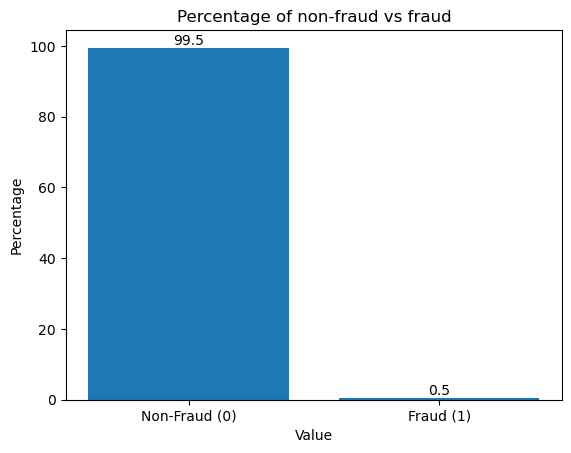

In [10]:
ratio = train["is_fraud"].value_counts() / len(train) *100
ratio

bar_plot = plt.bar(ratio.index, ratio.values)
plt.xlabel("Value")
plt.ylabel("Percentage")
plt.title("Percentage of non-fraud vs fraud")
plt.xticks(ratio.index, labels=["Non-Fraud (0)", "Fraud (1)"])

# Display the ratio on top of the bars
for bar, value in zip(bar_plot, ratio.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:.1f}", ha="center", va="bottom")

plt.show()

<Axes: xlabel='amt', ylabel='Density'>

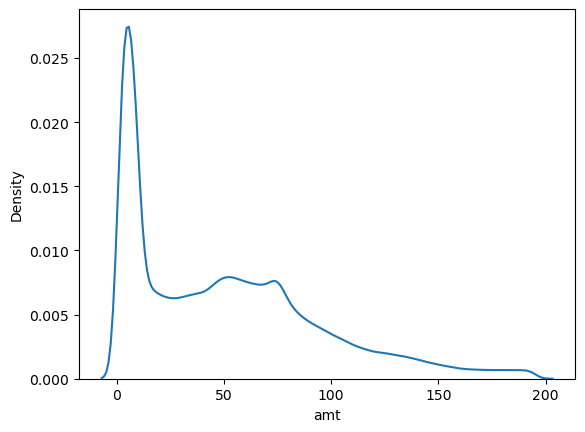

In [11]:
quantile_95 = train['amt'].quantile(0.95)
filtered_data = train[train['amt'] <= quantile_95]['amt']

sns.kdeplot(data=filtered_data)

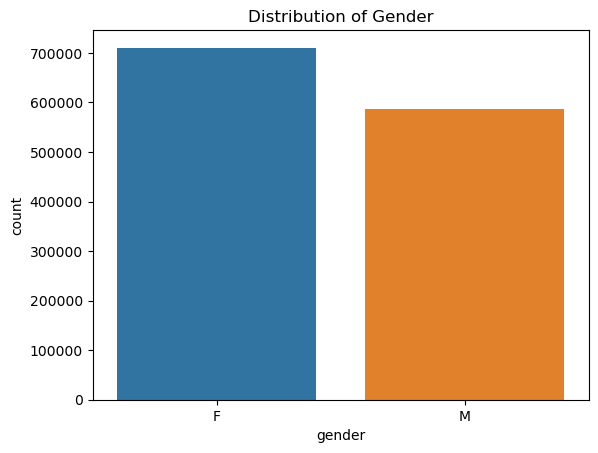

In [12]:
sns.countplot(data=train, x='gender')
plt.title('Distribution of Gender')
plt.show()

In [13]:
duplicates_count = train.duplicated(subset=["cc_num"]).sum()
print(f"total number duplicate users: {duplicates_count}")

total number duplicate users: 1295676


Text(0.5, 0.98, 'Age vs Fraud Class')

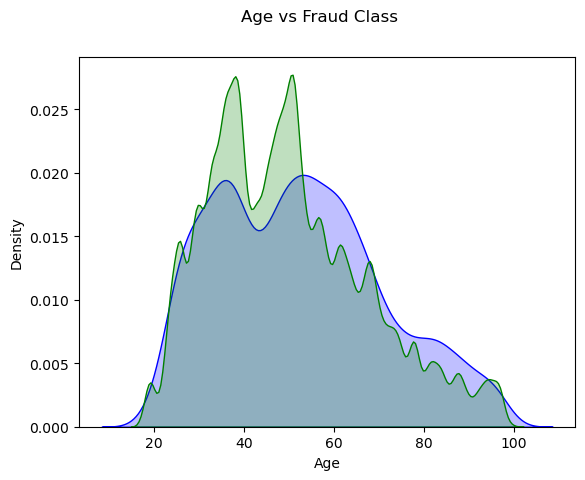

In [14]:
current_year = datetime.now().year
train['dob'] = pd.to_datetime(train['dob'])
train['age'] = current_year - train['dob'].dt.year

fig, ax = plt.subplots()

sns.kdeplot(train[train["is_fraud"]==1]["age"], fill=True, color="blue", label="Fraudulent", ax=ax)
sns.kdeplot(train[train["is_fraud"]==0]["age"], fill=True, color="green", label="Normal", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs Fraud Class")

Text(0.5, 0.98, 'Amount vs Fraud Class')

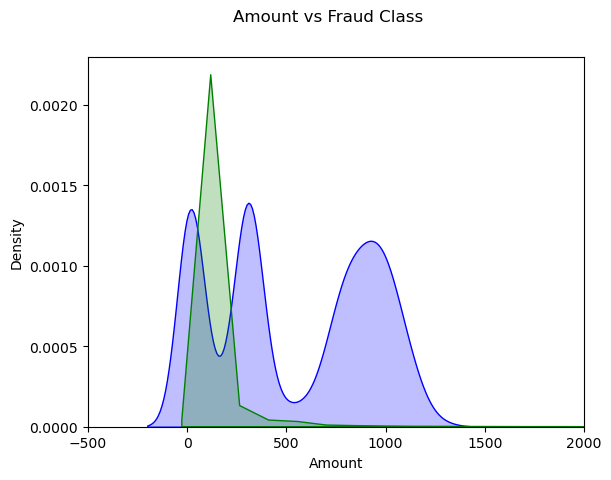

In [15]:
fig, ax = plt.subplots()

sns.kdeplot(train[train["is_fraud"]==1]["amt"], fill=True, color="blue", label="Fraudulent", ax=ax)
sns.kdeplot(train[train["is_fraud"]==0]["amt"], fill=True, color="green", label="Normal", ax=ax)

ax.set_xlabel("Amount")
ax.set_ylabel("Density")

ax.set_xlim(-500,2000)

fig.suptitle("Amount vs Fraud Class")

Text(0.5, 0.98, 'Amount vs Fraud Class')

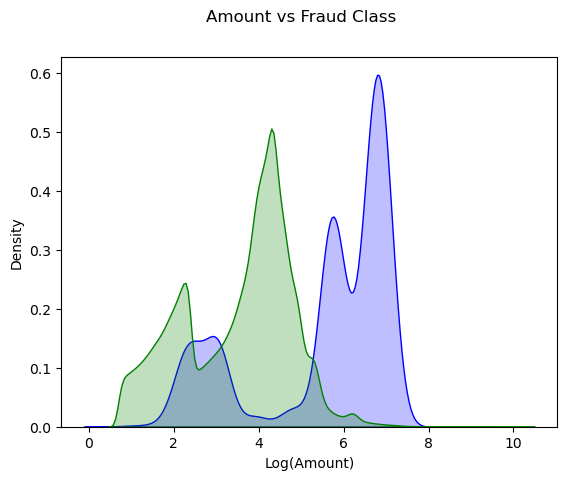

In [16]:
fig, ax = plt.subplots()

train['log_amt'] = np.log1p(train['amt']) # Use log(1+x) to handle cases where amount is 0
sns.kdeplot(train[train["is_fraud"]==1]["log_amt"], fill=True, color="blue", label="Fraudulent", ax=ax)
sns.kdeplot(train[train["is_fraud"]==0]["log_amt"], fill=True, color="green", label="Normal", ax=ax)
ax.set_xlabel("Log(Amount)")
ax.set_ylabel("Density")

fig.suptitle("Amount vs Fraud Class")


From the above kernel density plot, we can see that the peak of the curve for fraudulent transactions is approximately around the value of 7 of the x-axis, whereas that of non-fraudulent transactions is approximately around the value of 4. It shows that fraudulent transactions are more likely to involve higher amounts as compared to non-fraudulent ones. 

<Axes: xlabel='is_fraud', ylabel='amt'>

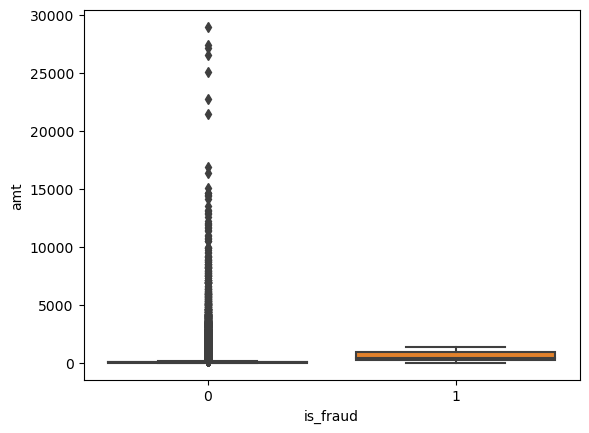

In [17]:
sns.boxplot(x="is_fraud", y="amt", data=train)

<Axes: xlabel='is_fraud', ylabel='amt'>

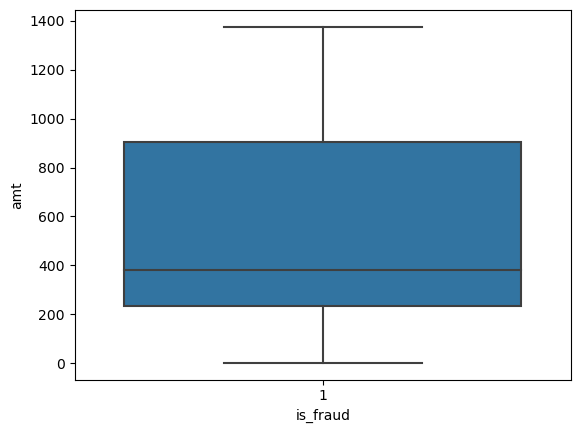

In [18]:
# getting a closer look at the fraudulent transactions
train_fraudulent = train[train["is_fraud"] == 1]
sns.boxplot(x="is_fraud", y="amt", data=train_fraudulent)

<Axes: xlabel='amt', ylabel='Count'>

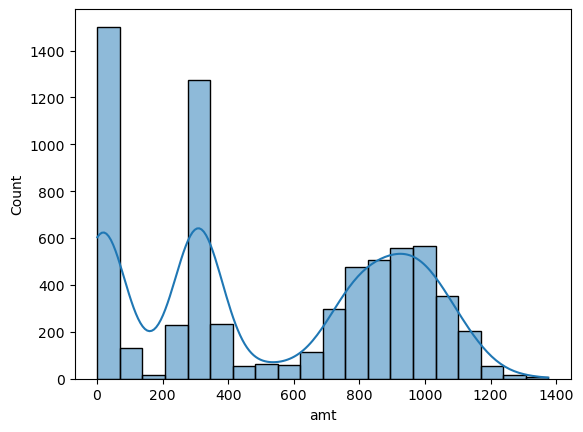

In [26]:
# create histogram to visualize the mode for fraudulent transactions
sns.histplot(train_fraudulent["amt"], kde=True)

Number of data points removed: 62576
Percentage of data points removed: 0.04850988089590097


<Axes: xlabel='is_fraud', ylabel='amt'>

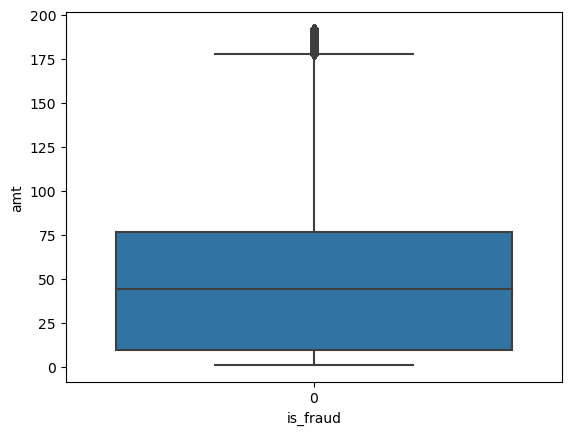

In [41]:
# remove outliers for non-fraudulent transactions to visualize histogram better
train_non_fraudulent = train[train["is_fraud"] == 0]

# calculate IQR and threshold values
IQR_train_non_fraudulent = np.percentile(train_non_fraudulent["amt"], 75) - np.percentile(train_non_fraudulent["amt"], 25)
lower_threshold = np.percentile(train_non_fraudulent["amt"], 25) - 1.5 * IQR_train_non_fraudulent
upper_threshold = np.percentile(train_non_fraudulent["amt"], 75) + 1.5 * IQR_train_non_fraudulent

# filter out data points outside threshold
train_non_fraudulent_without_outliers = train_non_fraudulent[train_non_fraudulent["amt"] <= upper_threshold]

print("Number of data points removed:", len(train_non_fraudulent) - len(train_non_fraudulent_without_outliers))
print("Percentage of data points removed:", (len(train_non_fraudulent) - len(train_non_fraudulent_without_outliers))/len(train_non_fraudulent))

sns.boxplot(x="is_fraud", y="amt", data=train_non_fraudulent_without_outliers)

<Axes: xlabel='amt', ylabel='Count'>

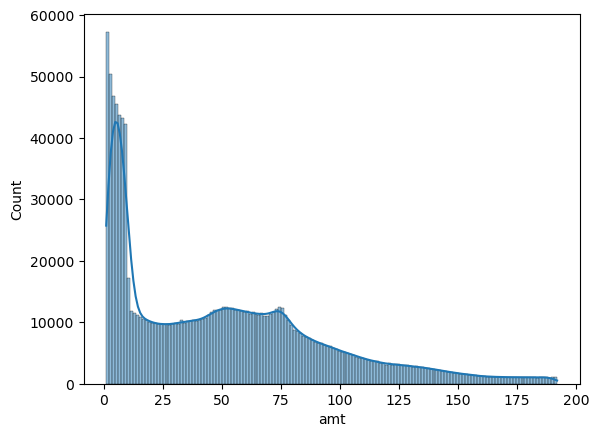

In [39]:
# create histogram to visualize the mode for non-fraudulent transactions
sns.histplot(train_non_fraudulent_without_outliers["amt"], kde=True)


In [20]:
numerical_variables = ["cc_num", "amt", "zip", "lat", "long", "city_pop","unix_time", "merch_lat", "merch_long", "is_fraud"]
cat_variables = ["merchant", "category", "first", "last", "gender", "street", "city", "state", "job","dob","trans_num"] 
remaining_variable = ["trans_date"]

Quantile Analysis

In [21]:
quantile = train[numerical_variables].describe().loc[['min', '25%', '50%', '75%', 'max']].transpose()
quantile.columns = ['min', 'Q1', 'Q2', 'Q3', 'max']
quantile['range'] = quantile['max'] - quantile['min']
quantile['IQR'] = quantile['Q3'] - quantile['Q1']
quantile

,min,Q1,Q2,Q3,max,range,IQR
cc_num,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18,4.992346e+18,4.462213e+15
amt,1.000000e+00,9.630000e+00,4.741000e+01,8.304000e+01,2.894890e+04,2.894790e+04,7.341000e+01
zip,1.257000e+03,2.623700e+04,4.817400e+04,7.201100e+04,9.992100e+04,9.866400e+04,4.577400e+04
lat,2.002710e+01,3.466890e+01,3.935430e+01,4.194040e+01,6.669330e+01,4.666620e+01,7.271500e+00
long,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.017520e+01,-6.795030e+01,9.772200e+01,1.662280e+01
city_pop,2.300000e+01,7.410000e+02,2.435000e+03,2.032800e+04,2.906700e+06,2.906677e+06,1.958700e+04
unix_time,1.325376e+09,1.342999e+09,1.357093e+09,1.374592e+09,1.388534e+09,6.315832e+07,3.159306e+07
merch_lat,1.902779e+01,3.474414e+01,3.936965e+01,4.195856e+01,6.751027e+01,4.848248e+01,7.214427e+00
merch_long,-1.666712e+02,-9.690138e+01,-8.744308e+01,-8.024942e+01,-6.695090e+01,9.972034e+01,1.665196e+01
is_fraud,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00


In [22]:
descriptive_stats = train[numerical_variables].describe().loc[['mean', 'std', '50%']].transpose()
descriptive_stats.columns = ['mean', 'std', 'median']
descriptive_stats['mode'] = train[numerical_variables].mode().transpose()[0]
descriptive_stats['mad'] = [stats.median_abs_deviation(train[x]) for x in numerical_variables]
descriptive_stats['kurtosis'] = [stats.kurtosis(train[x]) for x in numerical_variables]
descriptive_stats['skewness'] = [stats.skew(train[x]) for x in numerical_variables]

descriptive_stats

,mean,std,median,mode,mad,kurtosis,skewness
cc_num,4.176007e+17,1.309380e+18,3.521417e+15,4.642255e+15,3.076471e+15,6.168762,2.849939
amt,7.008490e+01,1.628042e+02,4.741000e+01,1.140000e+00,3.743000e+01,4745.821264,44.083100
zip,4.881636e+04,2.687663e+04,4.817400e+04,4.808800e+04,2.305800e+04,-1.095226,0.078953
lat,3.854065e+01,5.070134e+00,3.935430e+01,4.251640e+01,3.359700e+00,0.793040,-0.193119
long,-9.023144e+01,1.374897e+01,-8.747690e+01,-8.298320e+01,8.152700e+00,1.837713,-1.147256
city_pop,8.836546e+04,3.010802e+05,2.435000e+03,6.060000e+02,2.180000e+03,37.778840,5.606287
unix_time,1.358677e+09,1.820237e+07,1.357093e+09,1.381002e+09,1.580185e+07,-1.200275,-0.019366
merch_lat,3.854014e+01,5.104269e+00,3.936965e+01,3.384919e+01,3.386277e+00,0.775896,-0.189130
merch_long,-9.023124e+01,1.376077e+01,-8.744308e+01,-9.651176e+01,8.220304e+00,1.831452,-1.144245
is_fraud,5.175545e-03,7.175488e-02,0.000000e+00,0.000000e+00,0.000000e+00,188.221564,13.792083


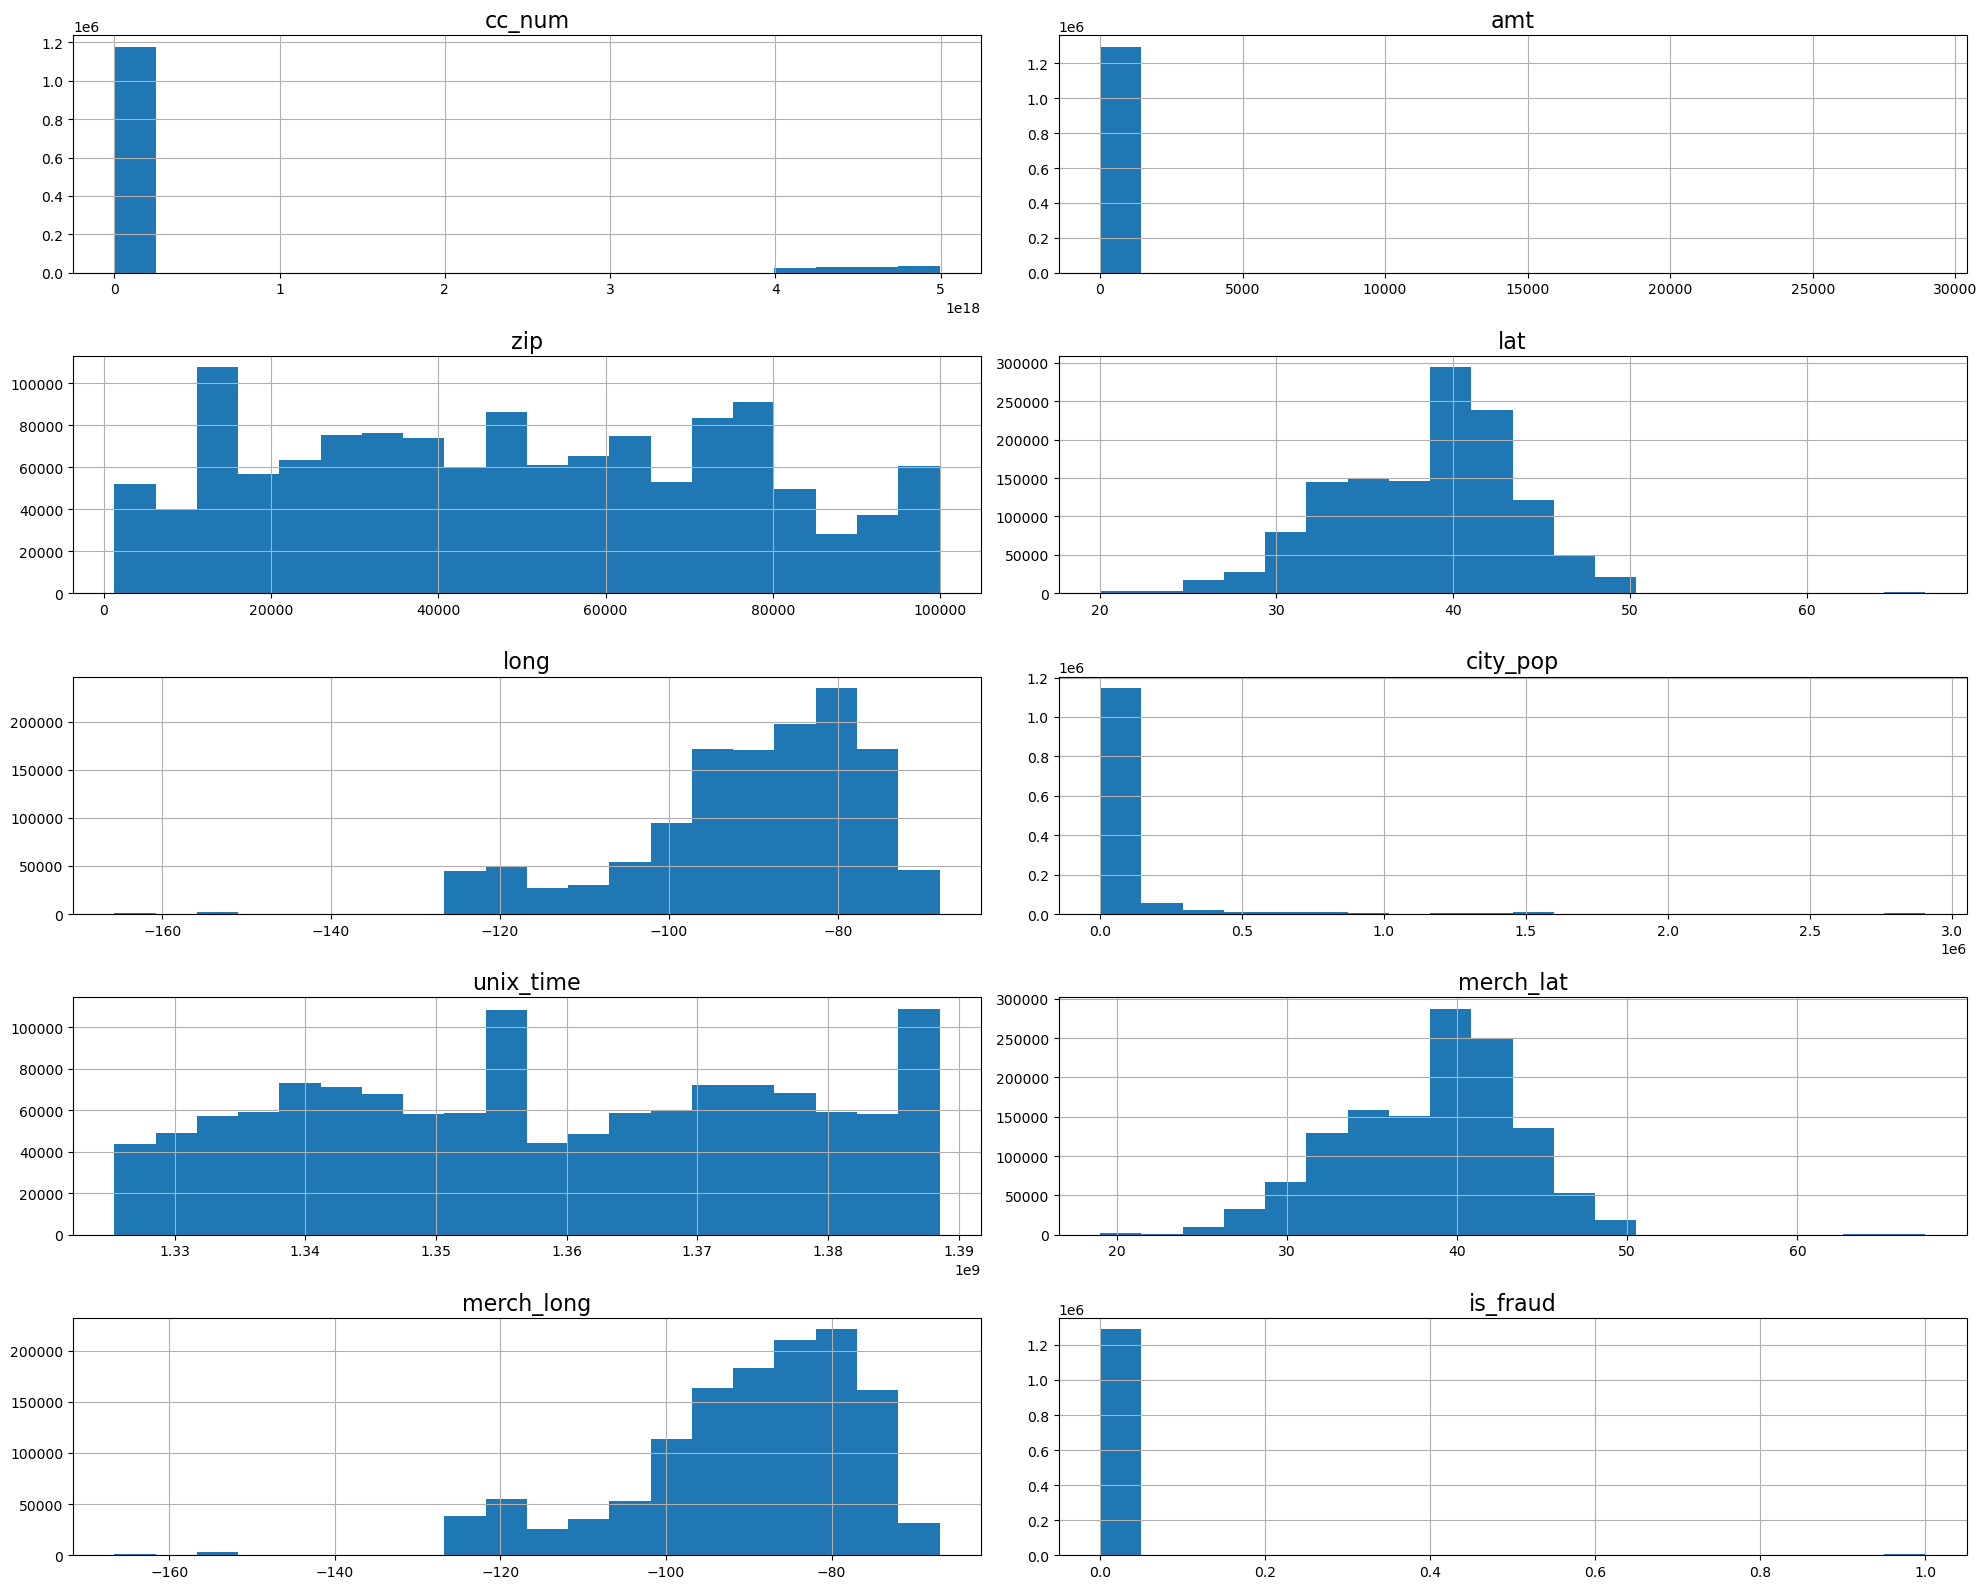

In [23]:
fig, axs = plt.subplots(5, 2, figsize=(20, 16))

axes = [None] * len(numerical_variables)

for index, name in enumerate(train[numerical_variables].columns):
    axes[index] = axs[index//2, index%2]
    train[name].hist(ax=axes[index], bins=20)
    axes[index].set_title(name, fontsize=16)

plt.tight_layout()
plt.show()

In [24]:
# f, axes = plt.subplots(6, 2, figsize=(16, 24), sharex=False)

# for index, name in enumerate(cat_variables):
#     sns.countplot(x=name, data=train, ax=axes[index//2,index%2])
#     axes[index//2,index%2].set_title(name, fontsize=20)
#     axes[index//2,index%2].set_xticklabels(axes[index//2,index%2].get_xticklabels(), rotation=60)
    
# plt.tight_layout()
#Don't run this unless you have hours to spare, it has to count over a million observations for 11 different categorical variables,
#some of which have only unique values